In [189]:
import pandas as pd

#A-preprocessing phase:

#1-turning csv file to a dataframe
data = pd.read_csv(r"C:\Users\T14s\Desktop\Learning\Formation IA\titanic-passengers.csv",delimiter=';')
df=pd.DataFrame(data)

df.set_index('PassengerId', inplace=True)

#pinting the 5 first rows
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [190]:
#2.counting the number of nan values for each column
print("number of Nan values :")
df.isnull().sum()

number of Nan values :


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [191]:
#3-cleaning data

#droping rows where 'Embarked' is Nan since there's only 2
df = df.dropna(subset=['Embarked'])

# Fill missing values with the mean
df['Age'].fillna(data['Age'].mean(), inplace=True)

# Fill missing values in the 'Cabin' column with the most frequent value
most_frequent = df['Cabin'].mode()[0]
df['Cabin'].fillna(most_frequent, inplace=True)

#print result
df


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,B96 B98,S
76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S
641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,B96 B98,S
568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,B96 B98,S
672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...
10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,B96 B98,C
61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,B96 B98,C
535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,B96 B98,S


In [192]:
#4-data transformation

from sklearn.preprocessing import LabelEncoder

#first we determine which columns are categorical
df.info() 

#we determine the values of the categorical columns(this will help with choosing which encoding type is better)
print("Survived : ",df['Survived'].unique())
print("Sex : ",df['Sex'].unique())
print("Cabin : ",df['Cabin'].unique())
print("Embarked : ",df['Embarked'].unique())

#since there's many posible values for ; name,ticket,cabin . and beacause they seems more important we will encode : sex,survived

#Label Encoding
df['Survived'] = LabelEncoder().fit_transform(df['Survived'])

#one hot encoding
df = pd.get_dummies(df, columns=['Sex'])

#print result
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 343 to 428
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    object 
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Cabin     889 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 83.3+ KB
Survived :  ['No' 'Yes']
Sex :  ['male' 'female']
Cabin :  ['B96 B98' 'F G73' 'B71' 'C82' 'C93' 'B41' 'C95' 'B38' 'C52' 'A32' 'C111'
 'C2' 'E101' 'D17' 'B22' 'B3' 'C45' 'B78' 'A31' 'C128' 'C30' 'A26'
 'C22 C26' 'D15' 'T' 'C54' 'C103' 'C125' 'D20' 'C78' 'E24' 'B82 B84' 'E12'
 'D9' 'D28' 'D19' 'G6' 'D48' 'C90' 'D56' 'E33' '

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,
343,0,2,"Collander, Mr. Erik Gustaf",28.000000,0,0,248740,13.0000,B96 B98,S,0,1
76,0,3,"Moen, Mr. Sigurd Hansen",25.000000,0,0,348123,7.6500,F G73,S,0,1
641,0,3,"Jensen, Mr. Hans Peder",20.000000,0,0,350050,7.8542,B96 B98,S,0,1
568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",29.000000,0,4,349909,21.0750,B96 B98,S,1,0
672,0,1,"Davidson, Mr. Thornton",31.000000,1,0,F.C. 12750,52.0000,B71,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000,1,0,237736,30.0708,B96 B98,C,1,0
61,0,3,"Sirayanian, Mr. Orsen",22.000000,0,0,2669,7.2292,B96 B98,C,0,1
535,0,3,"Cacic, Miss. Marija",30.000000,0,0,315084,8.6625,B96 B98,S,1,0


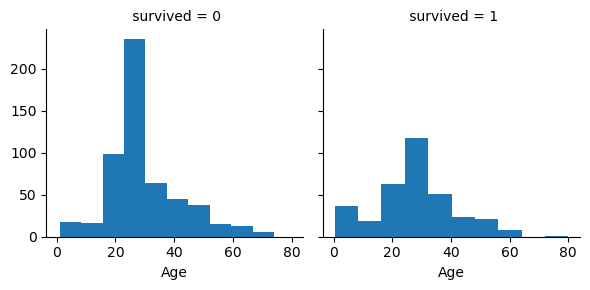

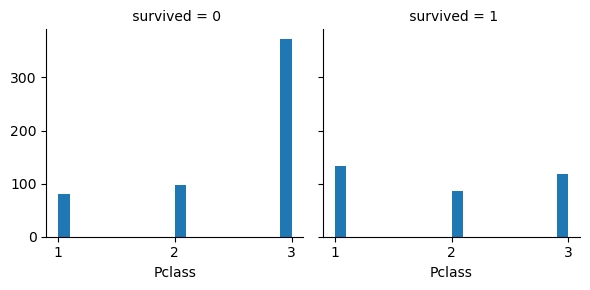

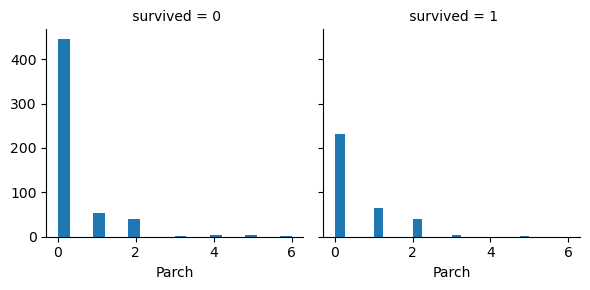

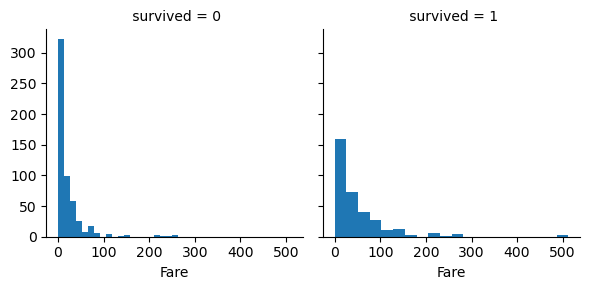

In [193]:
#B.Visualization phase:
import matplotlib.pyplot as plt
import seaborn as sns

#age impact
g=sns.FacetGrid(df, col="Survived")
g.map(plt.hist,'Age', bins=10)
g.set_titles(col_template=" survived = {col_name}")


#class impact
g=sns.FacetGrid(df, col="Survived")
g.map(plt.hist,'Pclass', bins=20)
g.set_titles(col_template=" survived = {col_name}")
plt.xticks([1, 2, 3])

#parch impact
g=sns.FacetGrid(df, col="Survived")
g.map(plt.hist,'Parch', bins=20)
g.set_titles(col_template=" survived = {col_name}")

#fare impact
g=sns.FacetGrid(df, col="Survived")
g.map(plt.hist,'Fare', bins=20)
g.set_titles(col_template=" survived = {col_name}")

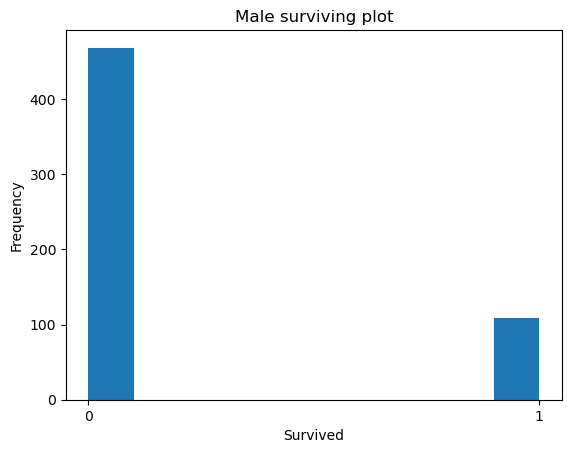

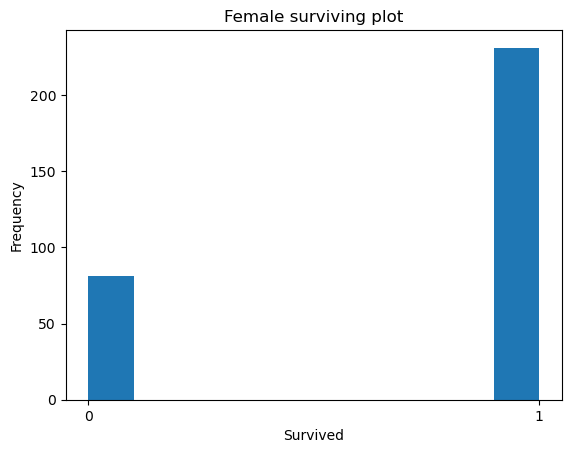

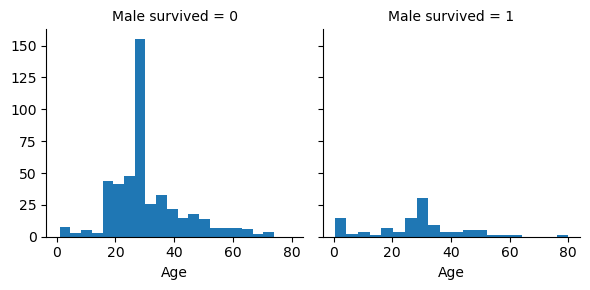

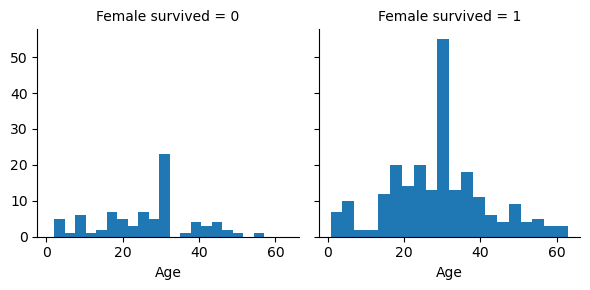

In [194]:
#sex impact
male_df = df[df['Sex_male'] == 1]
female_df = df[df['Sex_female'] == 1]

#male
plt.xlabel('Survived')
plt.title('Male surviving plot')
plt.xticks([0, 1])
male_df['Survived'].plot.hist()
plt.show()

#female
plt.xlabel('Survived')
plt.title('Female surviving plot')
plt.xticks([0, 1])
female_df['Survived'].plot.hist()
plt.show()

#sex and age impact
#male
g=sns.FacetGrid(male_df, col="Survived")
g.map(plt.hist,'Age', bins=20)
g.set_titles(col_template="Male survived = {col_name}")
#female
g=sns.FacetGrid(female_df, col="Survived")
g.map(plt.hist,'Age', bins=20)
g.set_titles(col_template="Female survived = {col_name}")


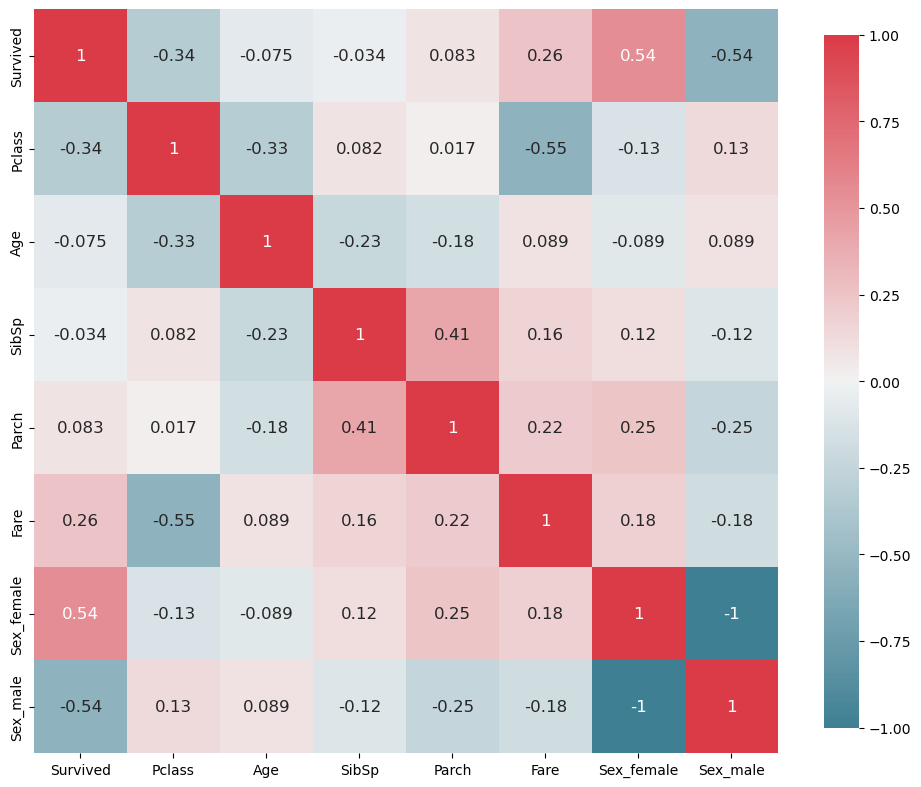

In [195]:
def plot_correlation_map(df):
    # Calculate the correlation matrix
    corr = df.corr(numeric_only=True)
    # Create a subplots figure with a specific size
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    # Define a color map for the heatmap
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    # Create a heatmap using Seaborn
    s = sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax=ax,
        annot = True,  # Display correlation values on the heatmap
        annot_kws = { 'fontsize' : 12 }  # Set font size for annotations
    )

# usage:
plot_correlation_map(df)
plt.show()  # Display the generated heatmap


In [197]:
class_survival_mean = df[['Pclass', 'Survived']].groupby('Pclass').mean()
# Display the result
print(class_survival_mean)


        Survived
Pclass          
1       0.626168
2       0.472826
3       0.242363


In [198]:
Title_Dictionary = {
"Capt": "Officer",
"Col": "Officer",
"Major": "Officer",
"Dr": "Officer",
"Rev": "Officer",
"Jonkheer": "Royalty",
"Don": "Royalty",
"Sir" : "Royalty",
"Lady" : "Royalty",
"the Countess" : "Royalty",
"Dona": "Royalty",
"Mme": "Miss",
"Mlle": "Miss",
"Miss" : "Miss",
"Ms": "Mrs",
"Mr" : "Mrs",
"Mrs" : "Mrs",
"Master" : "Master"
}
title=[]
for name in df['Name']:
    for key in Title_Dictionary:
        if key in name:
            title.append(Title_Dictionary[key])
            break
            
df['Title']=title

In [199]:
df.drop('Name', axis=1, inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Title
PassengerId,,,,,,,,,,,,
343,0,2,28.0,0,0,248740,13.0000,B96 B98,S,0,1,Officer
76,0,3,25.0,0,0,348123,7.6500,F G73,S,0,1,Mrs
641,0,3,20.0,0,0,350050,7.8542,B96 B98,S,0,1,Mrs
568,0,3,29.0,0,4,349909,21.0750,B96 B98,S,1,0,Mrs
672,0,1,31.0,1,0,F.C. 12750,52.0000,B71,S,0,1,Mrs


In [200]:
class_survival_mean = df[['Title', 'Survived']].groupby('Title').mean()
# Display the result
print(class_survival_mean)

         Survived
Title            
Master   0.575000
Miss     0.697802
Mrs      0.281399
Officer  0.333333
Royalty  0.375000


In [201]:
df['FamilySize']=df['Parch']+df['SibSp']
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Title,FamilySize
PassengerId,,,,,,,,,,,,,
343,0,2,28.0,0,0,248740,13.0000,B96 B98,S,0,1,Officer,0
76,0,3,25.0,0,0,348123,7.6500,F G73,S,0,1,Mrs,0
641,0,3,20.0,0,0,350050,7.8542,B96 B98,S,0,1,Mrs,0
568,0,3,29.0,0,4,349909,21.0750,B96 B98,S,1,0,Mrs,4
672,0,1,31.0,1,0,F.C. 12750,52.0000,B71,S,0,1,Mrs,1


In [202]:
class_survival_mean = df[['FamilySize', 'Survived']].groupby('FamilySize').mean()
# Display the result
print(class_survival_mean)

            Survived
FamilySize          
0           0.300935
1           0.552795
2           0.578431
3           0.724138
4           0.200000
5           0.136364
6           0.333333
7           0.000000
10          0.000000


In [ ]:
'''
Observations:
 -women had a higher survival rate compared to men.escpecially unmarried women (with title 'miss') between 20 and 40 years old.
 -officers and married men had the lowest survival rate
 -there is a positive correlation between the fare and surviving rate
 -first passengers survived most while third class passengers had very low surviving rate
 -families with 3 and 2 members survived the most while none of the familed with more than 7 members did
'''